<a href="https://colab.research.google.com/github/mahdislimen/Data-analysis-project/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importer la bibliothèque pandas avec l'alias pd
import pandas as pd

In [ ]:
# Load the dataset :
df = pd.read_csv("Data/datacamp_workspace_export_2023-07-01 18_19_07.csv")

In [ ]:
# determine the size of the  DataFrame (number of rows and columns ) :
df.shape

(100, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   caldate         100 non-null    object
 1   eventname       100 non-null    object
 2   catgroup        100 non-null    object
 3   priceperticket  100 non-null    int64 
 4   qtysold         100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [ ]:
df.head()

,caldate,eventname,catgroup,priceperticket,qtysold
0,2008-11-02T00:00:00.000Z,Built To Spill,Concerts,96,291
1,2008-11-19T00:00:00.000Z,Spring Awakening,Shows,137,261
2,2008-12-12T00:00:00.000Z,All My Sons,Shows,208,249
3,2008-10-29T00:00:00.000Z,Phantom of the Opera,Shows,93,244
4,2008-04-26T00:00:00.000Z,Shakira,Concerts,193,219


In [ ]:
df.columns

Index(['caldate', 'eventname', 'catgroup', 'priceperticket', 'qtysold'], dtype='object')

In [ ]:
print(df.head(5).to_markdown())

|    | caldate                  | eventname            | catgroup   |   priceperticket |   qtysold |
|---:|:-------------------------|:---------------------|:-----------|-----------------:|----------:|
|  0 | 2008-11-02T00:00:00.000Z | Built To Spill       | Concerts   |               96 |       291 |
|  1 | 2008-11-19T00:00:00.000Z | Spring Awakening     | Shows      |              137 |       261 |
|  2 | 2008-12-12T00:00:00.000Z | All My Sons          | Shows      |              208 |       249 |
|  3 | 2008-10-29T00:00:00.000Z | Phantom of the Opera | Shows      |               93 |       244 |
|  4 | 2008-04-26T00:00:00.000Z | Shakira              | Concerts   |              193 |       219 |


In [ ]:
df.tail(3)

,caldate,eventname,catgroup,priceperticket,qtysold
97,2008-05-03T00:00:00.000Z,Mystere Cirque du Soleil,Shows,397,166
98,2008-03-25T00:00:00.000Z,Flogging Molly,Concerts,318,166
99,2008-05-03T00:00:00.000Z,Mystere Cirque du Soleil,Shows,322,166


In [ ]:
category_counts = df['catgroup'].value_counts()

print(category_counts)

Shows       53
Concerts    47
Name: catgroup, dtype: int64


In [ ]:
# Calcul de la quantité totale de billets vendus
quantite_totale_billets_vendus = df['qtysold'].sum()

print(f"La quantité totale de billets vendus est de : {quantite_totale_billets_vendus}")

La quantité totale de billets vendus est de : 18201


In [ ]:
# Calculate total sales revenue
df['total_revenue'] = df['qtysold'] * df['priceperticket']
total_sales_revenue = df['total_revenue'].sum()

print(f"Total sales revenue is: {total_sales_revenue}")

Total sales revenue is: 3666394


In [ ]:
# Calculate average sales by event category
average_sales_by_category = df.groupby('catgroup')['qtysold'].mean()

print(average_sales_by_category)

catgroup
Concerts    185.574468
Shows       178.849057
Name: qtysold, dtype: float64


In [ ]:
# 1. Prepare the data
df['caldate'] = pd.to_datetime(df['caldate'])

# 2. Aggregate the sales data
sales_by_date = df.groupby('caldate')['qtysold'].sum()

# 3. Find the most active sales period
most_active_period = sales_by_date.idxmax()
total_tickets_sold = sales_by_date.max()

print(f"The most active sales period was on {most_active_period} with a total of {total_tickets_sold} tickets sold.")

The most active sales period was on 2008-08-31 00:00:00+00:00 with a total of 1034 tickets sold.


In [ ]:
import matplotlib.pyplot as plt

# 1. Charger le jeu de données et préparer la colonne 'caldate'
# Supposons que vous avez déjà chargé le jeu de données dans un DataFrame nommé 'df'.
# Si la colonne 'caldate' n'est pas au format datetime, vous pouvez la convertir comme ceci :
df['caldate'] = pd.to_datetime(df['caldate'])










In [ ]:
# 2. Agréger les données par date
# Nous allons grouper les ventes par jour pour cette analyse. Si vous souhaitez utiliser un autre niveau de granularité (mois, année, etc.), ajustez le code en conséquence.
sales_by_date = df.groupby(df['caldate'].dt.date)['qtysold'].sum()



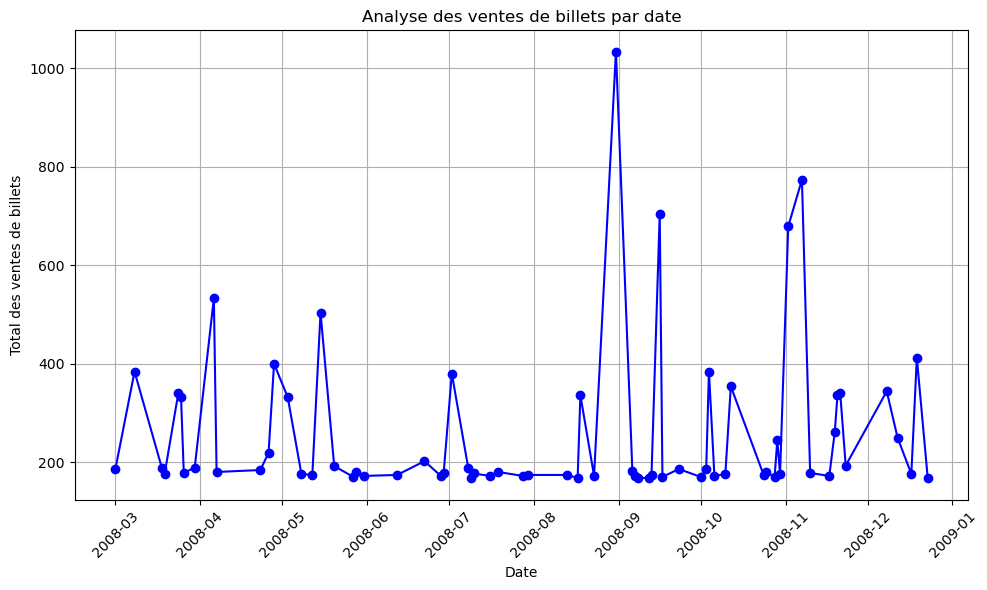

In [ ]:
# 3. Créer un graphique
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total des ventes de billets')
plt.title('Analyse des ventes de billets par date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

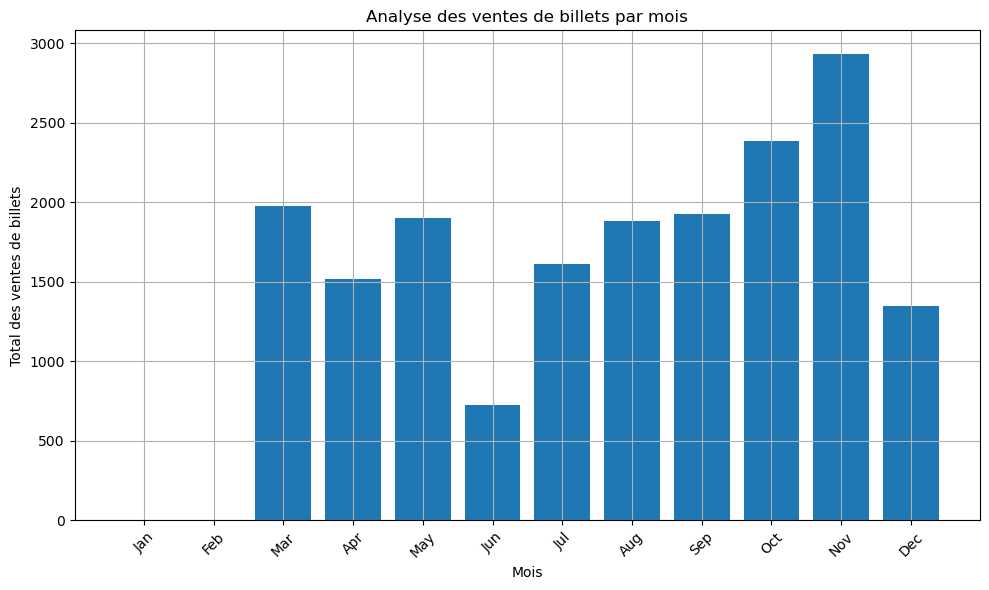

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
# Supposons que vous avez déjà chargé le jeu de données dans un DataFrame nommé 'df'.

# Convertir la colonne 'caldate' en datetime
df['caldate'] = pd.to_datetime(df['caldate'])

# Extraire le mois à partir de la colonne 'caldate'
df['month'] = df['caldate'].dt.month

# Grouper les ventes par mois et calculer le nombre total de billets vendus pour chaque mois
sales_by_month = df.groupby('month')['qtysold'].sum()

# Définir une liste de mois dans l'ordre
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Remplacer les mois manquants par 0 pour assurer la correspondance des mois et des valeurs
sales_by_month = sales_by_month.reindex(range(1, 13), fill_value=0)

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(months, sales_by_month.values)
plt.xlabel('Mois')
plt.ylabel('Total des ventes de billets')
plt.title('Analyse des ventes de billets par mois')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


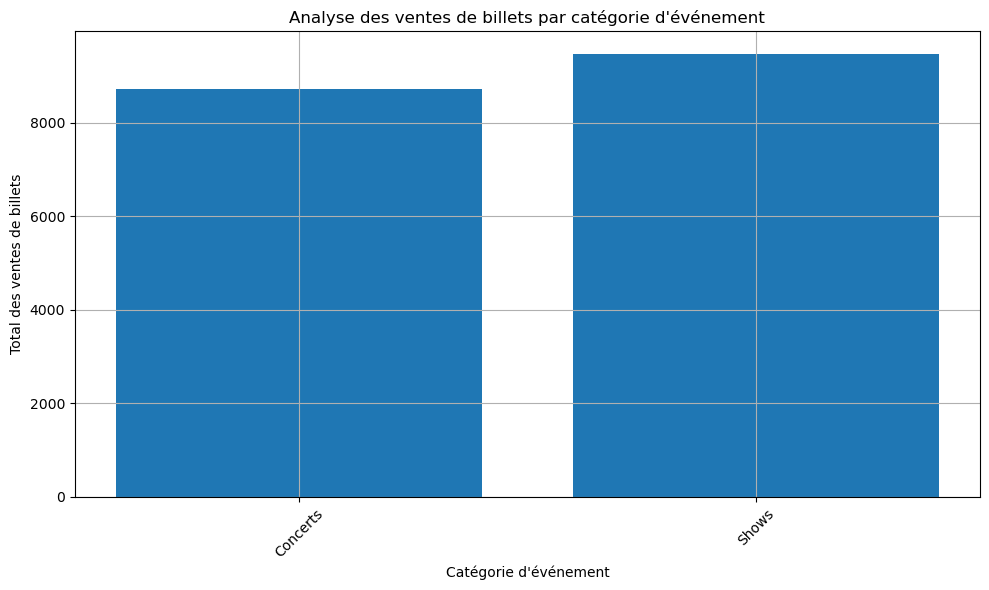

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
# Supposons que vous avez déjà chargé le jeu de données dans un DataFrame nommé 'df'.

# 1. Agrégation des ventes par catégorie d'événement
# Grouper les ventes par catégorie d'événement et calculer le nombre total de billets vendus pour chaque catégorie
sales_by_category = df.groupby('catgroup')['qtysold'].sum()

# 2. Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category.index, sales_by_category.values)
plt.xlabel('Catégorie d\'événement')
plt.ylabel('Total des ventes de billets')
plt.title('Analyse des ventes de billets par catégorie d\'événement')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


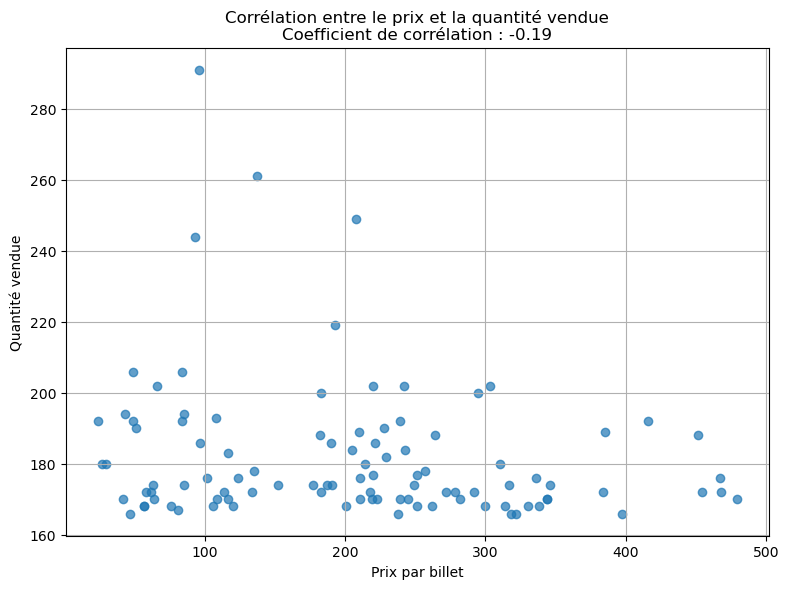

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
# Supposons que vous avez déjà chargé le jeu de données dans un DataFrame nommé 'df'.

# 1. Préparation des données
# Assurez-vous que les colonnes 'priceperticket' et 'qtysold' sont de types numériques
df['priceperticket'] = pd.to_numeric(df['priceperticket'])
df['qtysold'] = pd.to_numeric(df['qtysold'])

# 2. Calcul de la corrélation
correlation = df['priceperticket'].corr(df['qtysold'])

# 3. Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.scatter(df['priceperticket'], df['qtysold'], alpha=0.7)
plt.xlabel('Prix par billet')
plt.ylabel('Quantité vendue')
plt.title(f'Corrélation entre le prix et la quantité vendue\nCoefficient de corrélation : {correlation:.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()


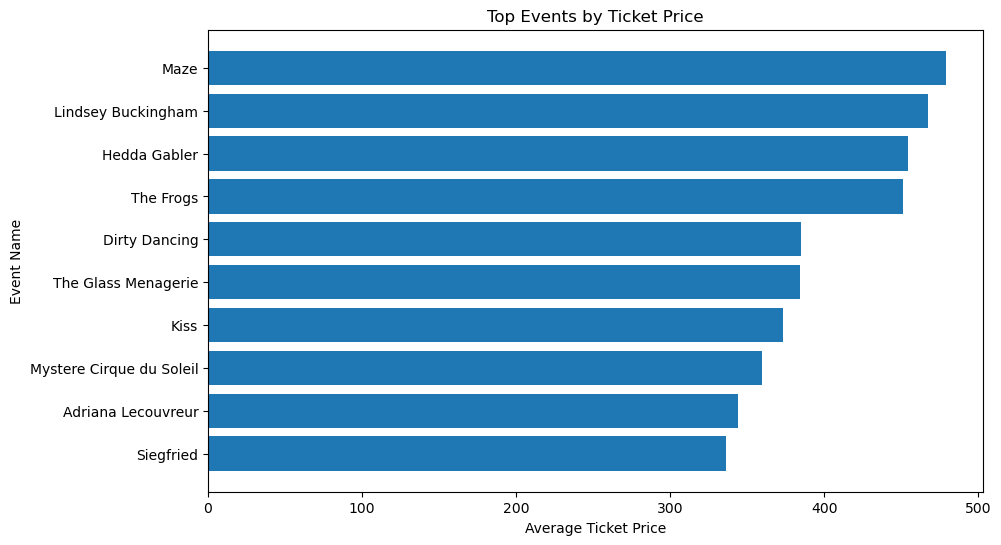

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming you have already loaded the dataset into a DataFrame named 'df'.

# Group by event name and calculate the average ticket price for each event
average_ticket_price_by_event = df.groupby('eventname')['priceperticket'].mean().reset_index()

# Sort the events based on ticket price in descending order to get the top events
top_events = average_ticket_price_by_event.sort_values(by='priceperticket', ascending=False).head(10)

# Create a horizontal bar chart to visualize the top events by price
plt.figure(figsize=(10, 6))
plt.barh(top_events['eventname'], top_events['priceperticket'])
plt.xlabel('Average Ticket Price')
plt.ylabel('Event Name')
plt.title('Top Events by Ticket Price')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest price on top
plt.show()


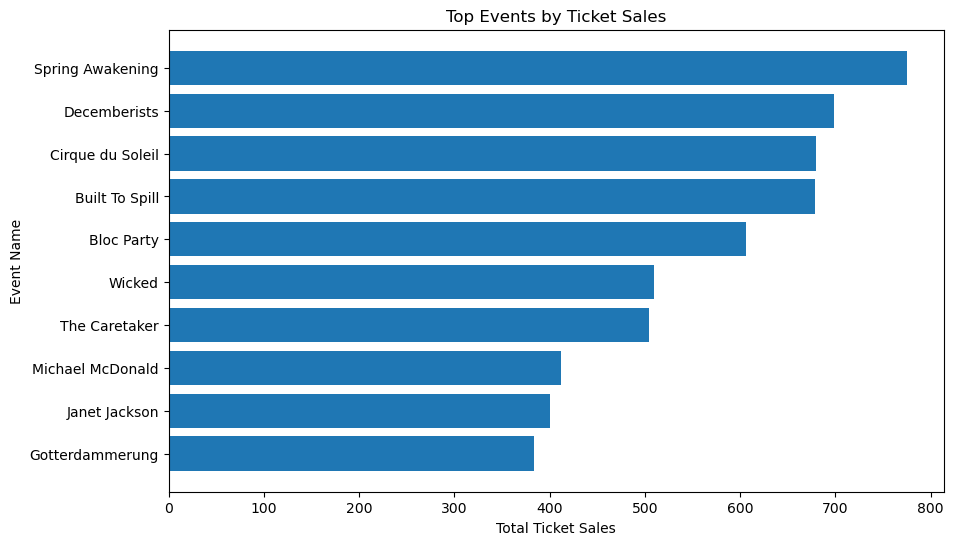

In [ ]:
total_ticket_sales_by_event = df.groupby('eventname')['qtysold'].sum().reset_index()

# Sort the events based on total ticket sales in descending order to get the top events
top_events = total_ticket_sales_by_event.sort_values(by='qtysold', ascending=False).head(10)

# Create a horizontal bar chart to visualize the top events by ticket sales
plt.figure(figsize=(10, 6))
plt.barh(top_events['eventname'], top_events['qtysold'])
plt.xlabel('Total Ticket Sales')
plt.ylabel('Event Name')
plt.title('Top Events by Ticket Sales')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest sales on top
plt.show()
